In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib
import datetime

# 데이터셋

In [2]:
food = pd.read_csv("data/음식.csv")
print(food.shape)
food.head()

(60, 12)


,날짜,식사구분,메뉴명,밀가루,튀김,육류,과일,과자류,초콜렛류,그외당류,외식여부,총음식수
0,23/03/30,저녁,"유부초밥, 치킨",0,1,0,0,0,0,0,0,2
1,23/03/30,간식,미니약과1개,0,0,0,0,0,0,1,0,1
2,23/03/31,저녁,"돈까스, 김치, 치킨",0,2,0,0,0,0,0,0,3
3,23/03/31,간식,투썸조각케이크,0,0,0,0,0,1,0,0,1
4,23/04/01,저녁,"피자, 맥주",1,0,0,0,0,0,0,1,2


In [3]:
indigestion = pd.read_csv("data/소화불량.csv")
print(indigestion.shape)
indigestion.head()

(23, 10)


,날짜,총수면,취침,기상,낮잠,과식여부,간식여부,먹고누움,증상,기타
0,23/03/30,9:32,7:18,16:50,NaN,No,Yes,No,0,NaN
1,23/03/31,9:18,8:09,17:27,NaN,Yes,Yes,No,4,NaN
2,23/04/01,8:00,7:30,15:30,NaN,No,Yes,No,0,NaN
3,23/04/02,1:55,7:25,9:20,NaN,Yes,Yes,No,5,"약속 때문에 밥, 카페 등으로 계속 먹어서 속이 가득찬 느낌"
4,23/04/03,6:11,3:15,9:26,NaN,No,Yes,No,3,NaN


In [4]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      60 non-null     object
 1   식사구분    60 non-null     object
 2   메뉴명     60 non-null     object
 3   밀가루     60 non-null     int64 
 4   튀김      60 non-null     int64 
 5   육류      60 non-null     int64 
 6   과일      60 non-null     int64 
 7   과자류     60 non-null     int64 
 8   초콜렛류    60 non-null     int64 
 9   그외당류    60 non-null     int64 
 10  외식여부    60 non-null     int64 
 11  총음식수    60 non-null     int64 
dtypes: int64(9), object(3)
memory usage: 5.8+ KB


In [5]:
indigestion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      23 non-null     object
 1   총수면     23 non-null     object
 2   취침      23 non-null     object
 3   기상      23 non-null     object
 4   낮잠      5 non-null      object
 5   과식여부    23 non-null     object
 6   간식여부    23 non-null     object
 7   먹고누움    23 non-null     object
 8   증상      23 non-null     int64 
 9   기타      8 non-null      object
dtypes: int64(1), object(9)
memory usage: 1.9+ KB


# 수면

## 총수면시간
- lineplot
- barplot
- 평균 총 수면시간 (6.652174), 최소(1), 최대(10)으로 시각화를 보아도 균일하지 못한 수면시간을 알 수 있다.

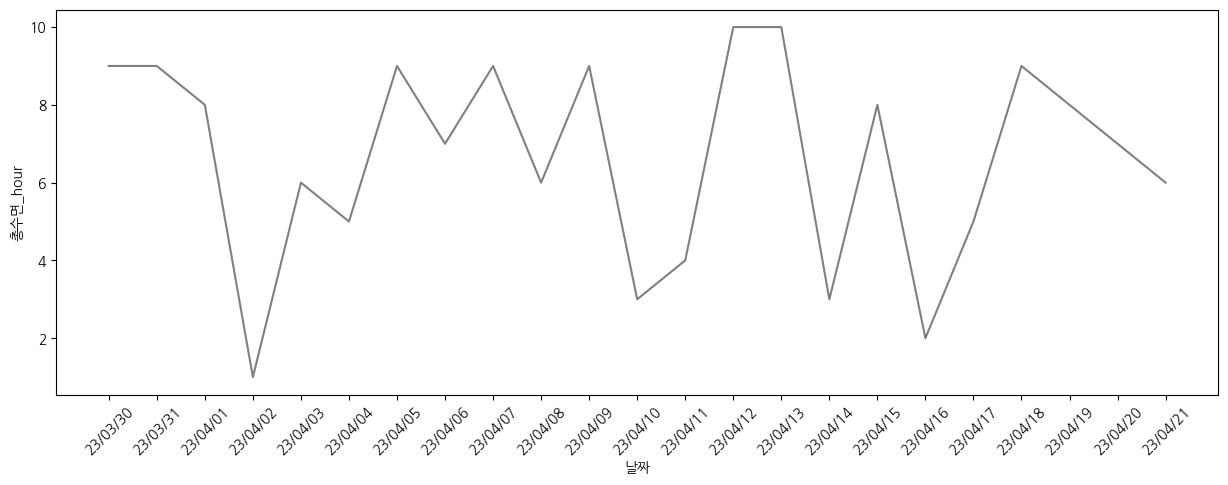

In [6]:
indigestion["총수면"] = pd.to_datetime(indigestion['총수면'])
indigestion["총수면_hour"] = indigestion["총수면"].dt.hour

plt.figure(figsize=(15,5))
sns.lineplot(data=indigestion, x="날짜", y=indigestion["총수면_hour"],
            color="gray")
plt.xticks(rotation=45);

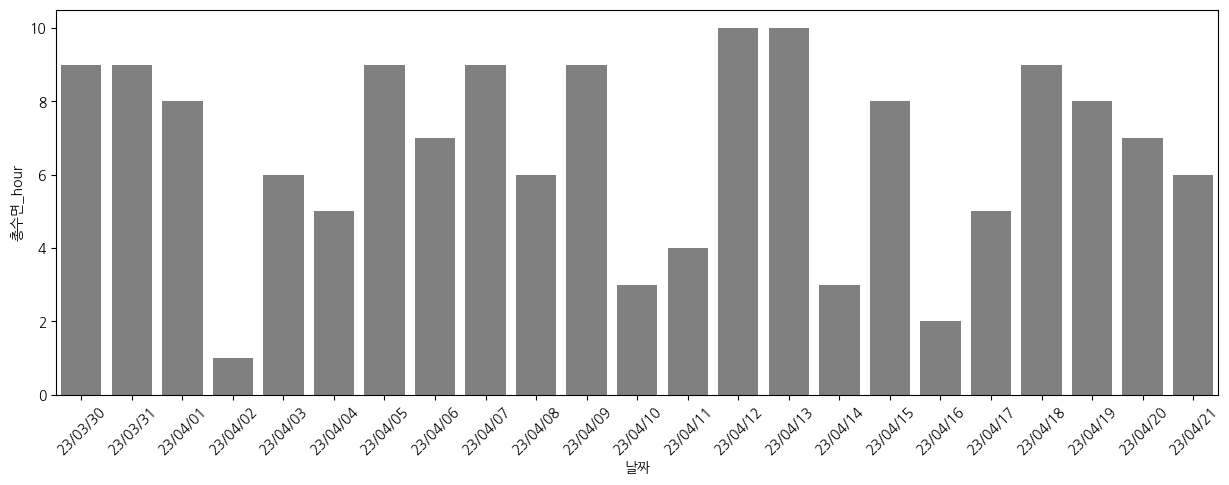

In [7]:
plt.figure(figsize=(15,5))
sns.barplot(data=indigestion, x="날짜", y=indigestion["총수면_hour"],
            color="grey")
plt.xticks(rotation=45);

In [40]:
# 평균으로부터 표준편차가 2.6이면, 표준편차가 크다고 할 수 있을까?
indigestion["총수면_hour"].describe()

count    23.000000
mean      6.652174
std       2.656188
min       1.000000
25%       5.000000
50%       7.000000
75%       9.000000
max      10.000000
Name: 총수면_hour, dtype: float64

## 취침 시간

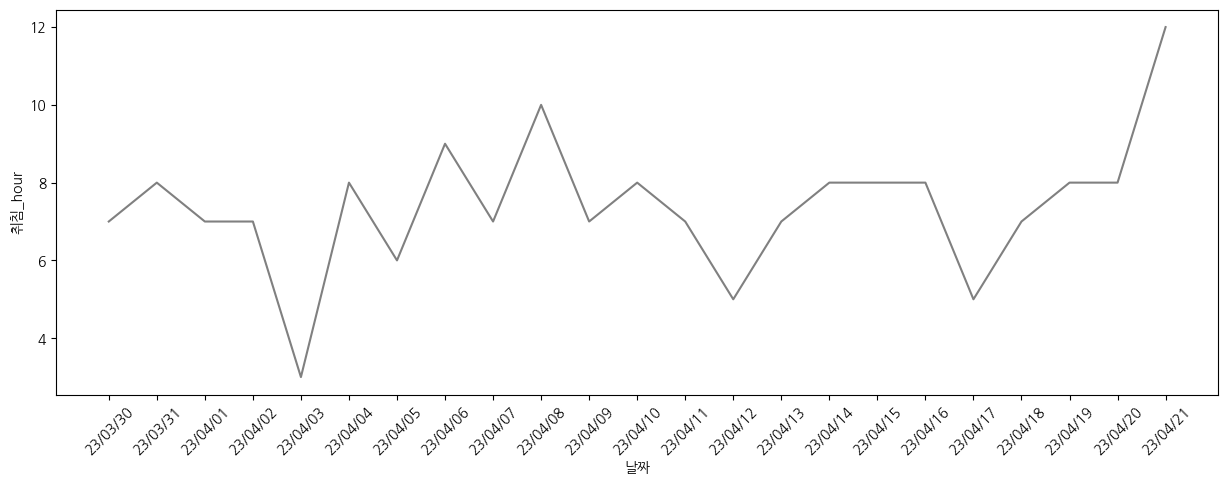

In [8]:
indigestion["취침"] = pd.to_datetime(indigestion['취침'])
indigestion["취침_hour"] = indigestion["취침"].dt.hour

plt.figure(figsize=(15,5))
sns.lineplot(data=indigestion, x="날짜", y=indigestion["취침_hour"],
            color="gray")
plt.xticks(rotation=45);

## 기상 시간

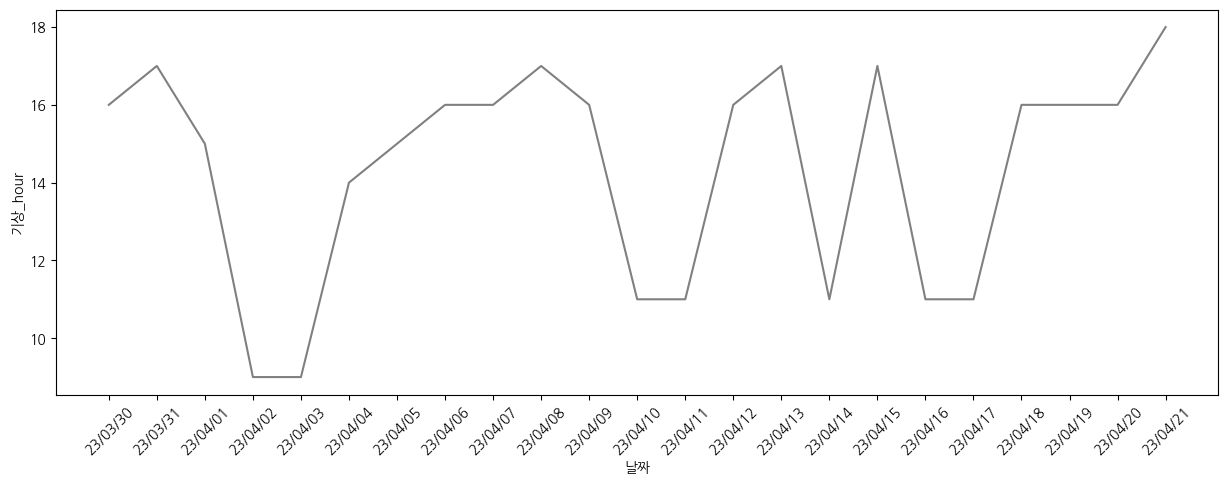

In [9]:
indigestion["기상"] = pd.to_datetime(indigestion['기상'])
indigestion["기상_hour"] = indigestion["기상"].dt.hour

plt.figure(figsize=(15,5))
sns.lineplot(data=indigestion, x="날짜", y=indigestion["기상_hour"],
            color="gray")
plt.xticks(rotation=45);

## 수면 시각화 한 그래프에

In [10]:
x_label = indigestion["날짜"]
y1 = indigestion["취침_hour"]
y2 = indigestion["기상_hour"]
y3 = indigestion["총수면_hour"]

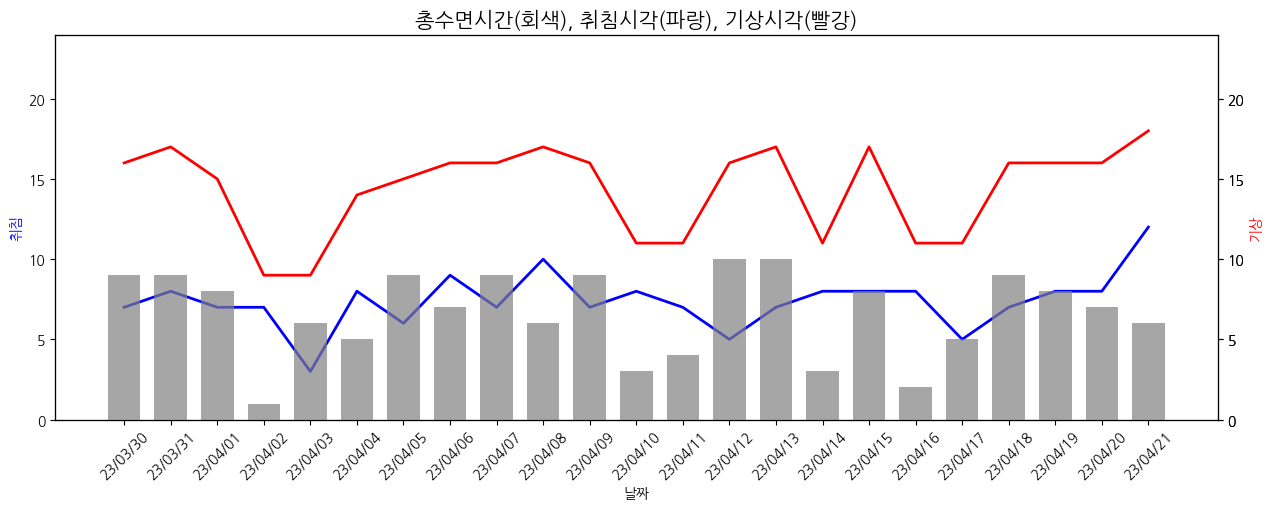

In [11]:
plt.rcParams['figure.figsize'] = (15, 5)

fig, ax1 = plt.subplots()

ax1.plot(x_label, y1, color="blue", linestyle="-", linewidth=2)
ax1.set_xlabel("날짜")
ax1.set_ylabel("취침", color="blue")
ax1.set_ylim([0, 24])
ax1.tick_params(axis="x", rotation=45)

ax2 = ax1.twinx()
ax2.plot(x_label, y2, color="red", linestyle="-", linewidth=2)
ax2.set_ylabel("기상", color="red")
ax2.set_ylim([0, 24])

ax3 = ax1.twinx()
ax3.bar(x_label, y3, color="gray", width=0.7, alpha=0.7)
ax3.set_ylim([0, 24])

plt.title("총수면시간(회색), 취침시각(파랑), 기상시각(빨강)", fontsize=15)
plt.show();

# 과식 변수 변경과 증상과의 상관관계
- Yes : 1 / No : 0

In [12]:
indigestion["과식여부"] = indigestion["과식여부"].map({"Yes" : 1, "No" : 0})
indigestion["간식여부"] = indigestion["간식여부"].map({"Yes" : 1, "No" : 0})
indigestion["먹고누움"] = indigestion["먹고누움"].map({"Yes" : 1, "No" : 0})

In [13]:
indigestion_small = indigestion[["과식여부", "간식여부", "먹고누움", "증상"]]
indigestion_small.head()

,과식여부,간식여부,먹고누움,증상
0,0,1,0,0
1,1,1,0,4
2,0,1,0,0
3,1,1,0,5
4,0,1,0,3


In [14]:
corr = indigestion_small.corr()
corr

,과식여부,간식여부,먹고누움,증상
과식여부,1.000000,-0.466569,-0.303488,0.593545
간식여부,-0.466569,1.000000,0.141598,-0.391579
먹고누움,-0.303488,0.141598,1.000000,-0.213279
증상,0.593545,-0.391579,-0.213279,1.000000


In [15]:
mask = np.triu(np.ones_like(corr))

In [16]:
print("Find most important features")
corr.sort_values(["증상"], ascending = False, inplace = True)
print(corr.증상)

Find most important features
증상      1.000000
과식여부    0.593545
먹고누움   -0.213279
간식여부   -0.391579
Name: 증상, dtype: float64


Text(0.5, 1.0, '식도염 증상에 영향을 미치는 요인')

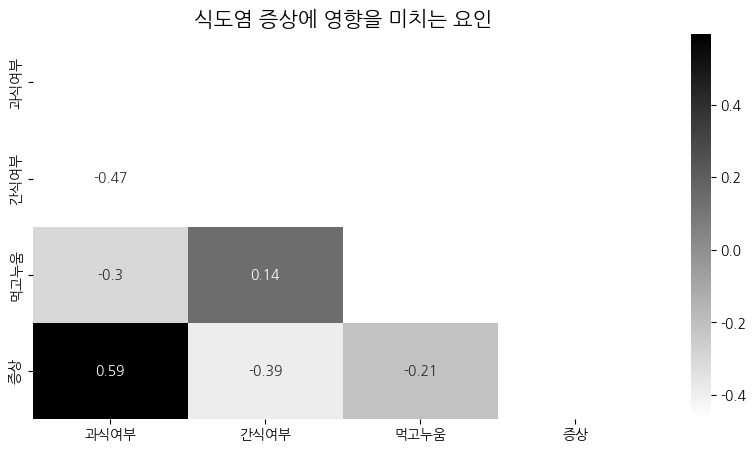

In [17]:
plt.figure(figsize=(10,5))
g = sns.heatmap(indigestion_small.corr(),annot=True,cmap="gray_r", mask=mask)
plt.title("식도염 증상에 영향을 미치는 요인", fontsize=15)

## food 데이터셋
- 위 상관관계에 따라 food 데이터셋 중 과식인 데이터만 뽑아서 시각화

In [18]:
symptom_food_m = pd.merge(food, indigestion[["날짜", "증상", "과식여부"]], 
                          on=["날짜"], how="left")
symptom_food_m.head()

,날짜,식사구분,메뉴명,밀가루,튀김,육류,과일,과자류,초콜렛류,그외당류,외식여부,총음식수,증상,과식여부
0,23/03/30,저녁,"유부초밥, 치킨",0,1,0,0,0,0,0,0,2,0.0,0.0
1,23/03/30,간식,미니약과1개,0,0,0,0,0,0,1,0,1,0.0,0.0
2,23/03/31,저녁,"돈까스, 김치, 치킨",0,2,0,0,0,0,0,0,3,4.0,1.0
3,23/03/31,간식,투썸조각케이크,0,0,0,0,0,1,0,0,1,4.0,1.0
4,23/04/01,저녁,"피자, 맥주",1,0,0,0,0,0,0,1,2,0.0,0.0


In [19]:
과식 = symptom_food_m[symptom_food_m["과식여부"]==1]
과식

,날짜,식사구분,메뉴명,밀가루,튀김,육류,과일,과자류,초콜렛류,그외당류,외식여부,총음식수,증상,과식여부
2,23/03/31,저녁,"돈까스, 김치, 치킨",0,2,0,0,0,0,0,0,3,4.0,1.0
3,23/03/31,간식,투썸조각케이크,0,0,0,0,0,1,0,0,1,4.0,1.0
6,23/04/02,점심,"유부초밥, 돈까스",0,1,0,0,0,0,0,1,2,5.0,1.0
7,23/04/02,간식,"말차프라푸치노, 아이스아메리카노, 딸기 티라미수",0,0,0,0,0,1,1,1,3,5.0,1.0
8,23/04/02,저녁,"냉면, 만두",1,0,0,0,0,0,0,1,2,5.0,1.0
15,23/04/06,저녁,"고기, 김치볶음밥",0,0,1,0,0,0,0,0,2,4.0,1.0
23,23/04/10,점심,"콩나물국, 밥, 식빵(딸기잼, 땅콩잼)",1,0,0,0,0,0,0,0,3,5.0,1.0
24,23/04/10,저녁,"순두부찌개, 밥",0,0,0,0,0,0,0,0,2,5.0,1.0
30,23/04/13,저녁,"고기, 소고기국, 밥, 김치",0,0,2,0,0,0,0,0,4,4.0,1.0
31,23/04/13,간식,첵스초코,0,0,0,0,0,1,0,0,1,4.0,1.0


In [20]:
# 총음식수는 정확하게 기록이 되지 않은 부분이 있다. => 데이터를 쌓을 때 정확하게 기록하는 것이 필요
symptom_food_m[symptom_food_m["과식여부"]==1]["총음식수"].mean()

2.5294117647058822

Text(0.5, 1.0, '과식일 때, 식사구분')

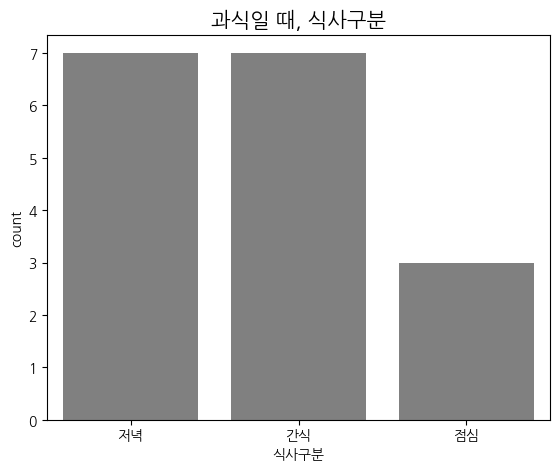

In [21]:
plt.figure(figsize=(6.5,5))
sns.countplot(data=과식, x="식사구분", color="gray")
plt.title("과식일 때, 식사구분", fontsize=15)

Text(0.5, 1.0, '식사구분')

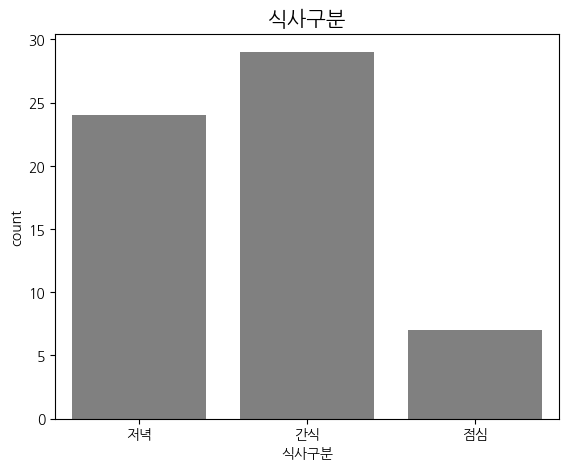

In [22]:
plt.figure(figsize=(6.5,5))
sns.countplot(data=food, x="식사구분", color="gray")
plt.title("식사구분", fontsize=15)

In [23]:
과식.columns

Index(['날짜', '식사구분', '메뉴명', '밀가루', '튀김', '육류', '과일', '과자류', '초콜렛류', '그외당류',
       '외식여부', '총음식수', '증상', '과식여부'],
      dtype='object')

In [24]:
과식_groupby = symptom_food_m.groupby(["과식여부"]).sum()
과식_groupby = 과식_groupby[['밀가루', '튀김', '육류', '과일', '과자류', '초콜렛류', '그외당류']]
과식_groupby

,밀가루,튀김,육류,과일,과자류,초콜렛류,그외당류
과식여부,,,,,,,
0.0,16,2,13,4,4,3,12
1.0,6,3,4,2,3,5,1


In [25]:
과식_groupby[과식_groupby.index==0]

,밀가루,튀김,육류,과일,과자류,초콜렛류,그외당류
과식여부,,,,,,,
0.0,16,2,13,4,4,3,12


In [26]:
symptom_food_m.groupby(["과식여부"]).mean()

,밀가루,튀김,육류,과일,과자류,초콜렛류,그외당류,외식여부,총음식수,증상
과식여부,,,,,,,,,,
0.0,0.400000,0.050000,0.325000,0.100000,0.100000,0.075000,0.300000,0.050000,2.175000,1.750000
1.0,0.352941,0.176471,0.235294,0.117647,0.176471,0.294118,0.058824,0.176471,2.529412,3.764706


In [27]:
과식_groupby.values

array([[16,  2, 13,  4,  4,  3, 12],
       [ 6,  3,  4,  2,  3,  5,  1]], dtype=int64)

In [28]:
x_label = 과식_groupby.columns
y1 = 과식_groupby.values[0]
y2 = 과식_groupby.values[1]

In [29]:
과식_groupby2 = 과식_groupby.reset_index()
과식_groupby2

,과식여부,밀가루,튀김,육류,과일,과자류,초콜렛류,그외당류
0,0.0,16,2,13,4,4,3,12
1,1.0,6,3,4,2,3,5,1


In [30]:
과식_groupby2 = 과식_groupby2.melt(id_vars=["과식여부"], value_vars=과식_groupby2.columns[1:]
                               , var_name="음식종류", value_name="음식종류빈도")
과식_groupby2

,과식여부,음식종류,음식종류빈도
0,0.0,밀가루,16
1,1.0,밀가루,6
2,0.0,튀김,2
3,1.0,튀김,3
4,0.0,육류,13
5,1.0,육류,4
6,0.0,과일,4
7,1.0,과일,2
8,0.0,과자류,4
9,1.0,과자류,3


Text(0.5, 1.0, '과식여부에 따른 음식종류빈도')

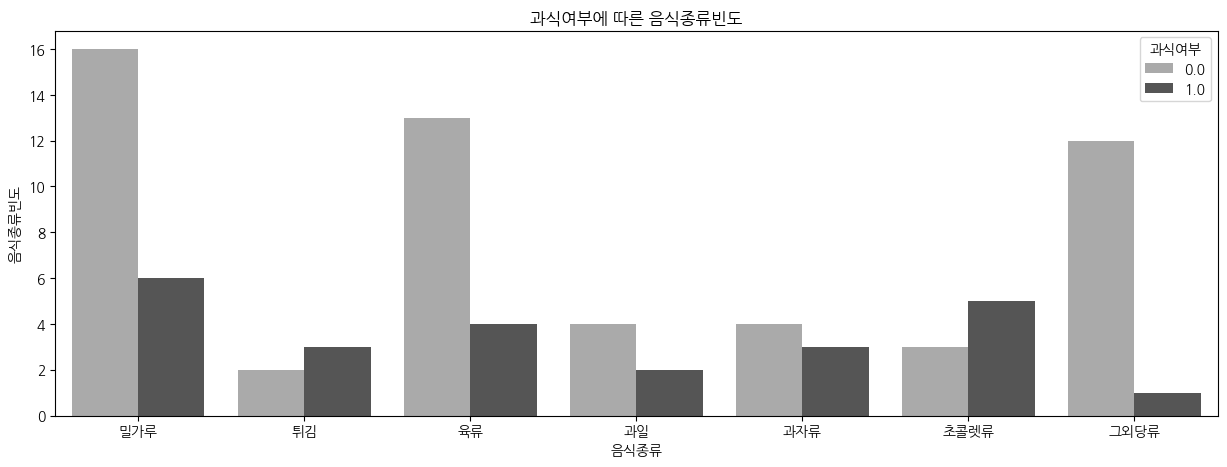

In [31]:
sns.barplot(data=과식_groupby2, x="음식종류", y="음식종류빈도", hue="과식여부", palette="binary")
plt.title("과식여부에 따른 음식종류빈도")

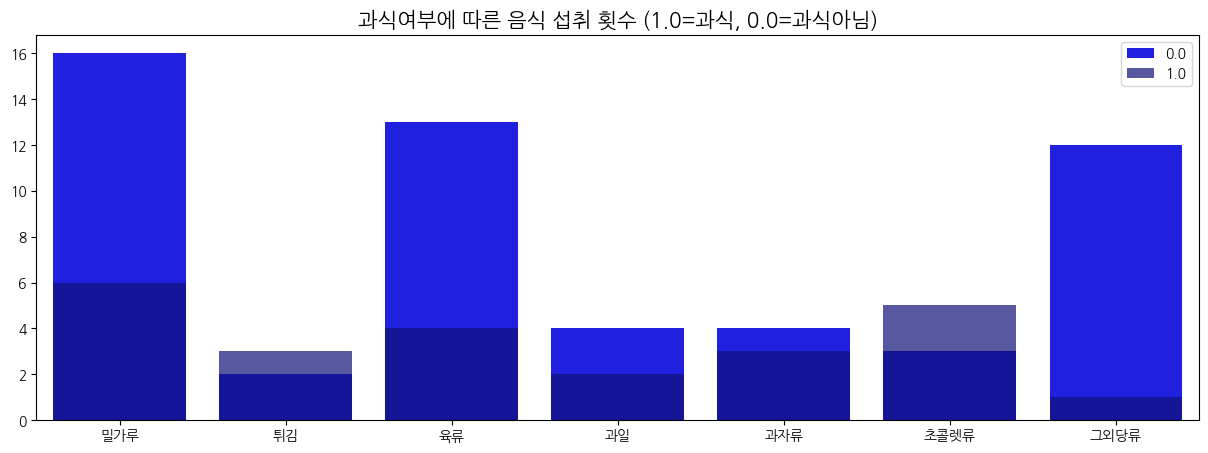

In [32]:
sns.barplot(data=과식_groupby[과식_groupby.index==0], color="blue", ci=None)
sns.barplot(data=과식_groupby[과식_groupby.index==1], color="darkblue", ci=None, alpha=0.7)
plt.legend(과식_groupby.index)
plt.title("과식여부에 따른 음식 섭취 횟수 (1.0=과식, 0.0=과식아님)", fontsize=15);

In [33]:
symptom_food_m.head()

,날짜,식사구분,메뉴명,밀가루,튀김,육류,과일,과자류,초콜렛류,그외당류,외식여부,총음식수,증상,과식여부
0,23/03/30,저녁,"유부초밥, 치킨",0,1,0,0,0,0,0,0,2,0.0,0.0
1,23/03/30,간식,미니약과1개,0,0,0,0,0,0,1,0,1,0.0,0.0
2,23/03/31,저녁,"돈까스, 김치, 치킨",0,2,0,0,0,0,0,0,3,4.0,1.0
3,23/03/31,간식,투썸조각케이크,0,0,0,0,0,1,0,0,1,4.0,1.0
4,23/04/01,저녁,"피자, 맥주",1,0,0,0,0,0,0,1,2,0.0,0.0


In [34]:
corr = symptom_food_m.corr()
corr

,밀가루,튀김,육류,과일,과자류,초콜렛류,그외당류,외식여부,총음식수,증상,과식여부
밀가루,1.000000e+00,-0.172581,-0.065210,0.152443,-0.071230,-0.269069,-0.152638,2.439851e-17,0.220144,-0.118438,-0.036800
튀김,-1.725806e-01,1.000000,-0.143488,-0.083859,-0.091429,-0.098677,-0.010178,1.061948e-01,0.009140,0.037859,0.170533
육류,-6.520969e-02,-0.143488,1.000000,-0.084497,-0.207278,-0.223710,-0.223048,-1.719675e-01,0.453552,0.000684,-0.077631
과일,1.524432e-01,-0.083859,-0.084497,1.000000,-0.121141,-0.130744,-0.040456,-1.005038e-01,0.157428,0.030064,0.026307
과자류,-7.123010e-02,-0.091429,-0.207278,-0.121141,1.000000,0.162909,0.060910,-1.095758e-01,-0.130144,0.048506,0.106590
초콜렛류,-2.690691e-01,-0.098677,-0.223710,-0.130744,0.162909,1.000000,-0.087274,5.913124e-02,-0.206620,0.272918,0.288595
그외당류,-1.526380e-01,-0.010178,-0.223048,-0.040456,0.060910,-0.087274,1.000000,1.341763e-01,-0.192536,-0.308716,-0.262961
외식여부,2.439851e-17,0.106195,-0.171968,-0.100504,-0.109576,0.059131,0.134176,1.000000e+00,-0.076677,0.118312,0.204530
총음식수,2.201436e-01,0.009140,0.453552,0.157428,-0.130144,-0.206620,-0.192536,-7.667656e-02,1.000000,0.042906,0.125257
증상,-1.184377e-01,0.037859,0.000684,0.030064,0.048506,0.272918,-0.308716,1.183120e-01,0.042906,1.000000,0.541764


In [35]:
mask = np.triu(np.ones_like(corr))

In [36]:
print("Find most important features")
corr.sort_values(["증상"], ascending = False, inplace = True)
print(corr.증상)

Find most important features
증상      1.000000
과식여부    0.541764
초콜렛류    0.272918
외식여부    0.118312
과자류     0.048506
총음식수    0.042906
튀김      0.037859
과일      0.030064
육류      0.000684
밀가루    -0.118438
그외당류   -0.308716
Name: 증상, dtype: float64


In [37]:
print("Find most important features")
corr.sort_values(["과식여부"], ascending = False, inplace = True)
print(corr.과식여부)

Find most important features
과식여부    1.000000
증상      0.541764
초콜렛류    0.288595
외식여부    0.204530
튀김      0.170533
총음식수    0.125257
과자류     0.106590
과일      0.026307
밀가루    -0.036800
육류     -0.077631
그외당류   -0.262961
Name: 과식여부, dtype: float64


Text(0.5, 1.0, '음식 상관관계')

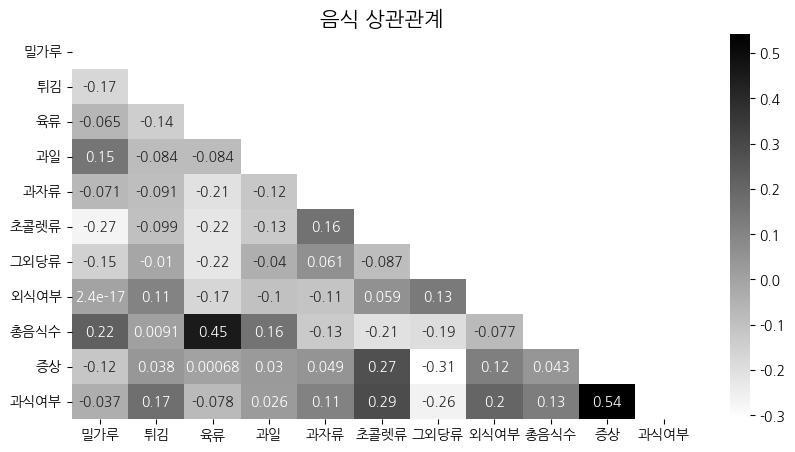

In [38]:
plt.figure(figsize=(10,5))
g = sns.heatmap(symptom_food_m.corr(),annot=True,cmap="gray_r", mask=mask)
plt.title("음식 상관관계", fontsize=15)